In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression 

plt.rcParams.update({'font.size': 12})
#plt.rcParams["font.family"] = "cmr10"

In [2]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return m/sd

In [3]:
path = os.getcwd()
print(path) 

#file_list contem somente os dados com resposta de frequencia
file_list = sorted(glob.glob('*amostra*.txt'))

nomes = ['Estanho', 'Cobre', 'Magnésio','Molibdênio', 'Silício', 'Grafite', 'vidro1', 'vidro2']

pd.Series(file_list, nomes)

C:\Users\Arthur\Documents\000 UNICAMP\F740\exp2\notebook


Estanho           amostra10_30-120_002_17_26-04-22_22-57.TXT
Cobre              amostra1_20-100_002_25_19-04-22_21-30.TXT
Magnésio           amostra2_20-120_002_17_03-05-22_22-07.TXT
Molibdênio         amostra6_30-120_002_17_26-04-22_21-46.TXT
Silício            amostra7_20-110_002_25_19-04-22_22-26.TXT
Grafite           amostra_c_20-120_002_17_03-05-22_20-18.TXT
vidro1        amostra_vidro2_00-30_002_17_03-05-22_22-29.TXT
vidro2         amostra_vidro_20-80_002_17_03-05-22_21-00.TXT
dtype: object

In [4]:
i = 0
amostras = len(nomes)
df = [pd.read_table(file_list[i], header = 17, decimal=",") for i in range(amostras)]

# ajeitando os dados
for i in range(amostras):
    df[i].rename(columns = {list(df[i])[0]: 'angulo'}, inplace = True)
    df[i].rename(columns = {list(df[i])[1]: 'intensidade'}, inplace = True)
    df[i] = df[i][:-1]
    df[i]['angulo'] = [x.replace(',', '.') for x in df[i]['angulo']]
    df[i]['angulo'] = df[i]['angulo'].astype(float) 

# Concatenando as duas medidas do vidro para fazer um gráfico só
df[amostras-1] = pd.concat([df[amostras-2][:999], df[amostras-1]], axis=0)

df[2]=df[2].drop(df[2].index[:300]).reset_index(drop = True)

df[2]

,angulo,intensidade
0,26.04,18
1,26.06,13
2,26.08,19
3,26.10,16
4,26.12,9
...,...,...
4693,119.90,4
4694,119.92,7
4695,119.94,4
4696,119.96,10


In [5]:
print(signaltonoise(df[0]['intensidade']))

1.208741827119774


In [6]:
""" Função geral para plotar os espectros de cada amostra,
    com opção de plotar média móvel """

def plot_spectro(df, color, name, xlim=(0,100), ylim=(0,100), window_size = 0, peak_min_height = 0, distance_peaks = 0):
    
    plt.figure(figsize=(10,5))
    if window_size:
        plt.plot(df['angulo'], df['intensidade'].rolling(window_size).mean(), alpha=0.7, color = 'red', label='Média movel')
    else:
        plt.plot(df['angulo'], df['intensidade'], alpha=0.7, color = 'dodgerblue', label='Dados coletados')

    plt.grid(True, alpha = 0.7)
    
    # achando os picos
    df2 = df.copy()
    df2['intensidade'] = df2['intensidade'].rolling(window_size).mean()
    
    peaks, h = find_peaks(df2['intensidade'], height = peak_min_height, distance =  distance_peaks)
    print(peaks, h, '\n angulos dos picos: \n', df2['angulo'][peaks])
    plt.plot(df2['angulo'][peaks], h['peak_heights'], "x", label = 'Picos')
    
    # Plot principal
    plt.xlabel(r'Ângulo de medida ($2 \theta$)', size=14)
    plt.ylabel('Intensidade (contagens)', size=14)
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.title('Intensidade dos raios-x refletidos de uma amostra de {}\n'
              'em função do ângulo de medida'.format(name),
              size=16)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()


    plt.tight_layout()
    plt.savefig('spectro_{}.pdf'.format(name))

[ 556 1466 2216 3602 4327] {'peak_heights': array([ 67.96666667, 370.16666667, 154.83333333,  34.63333333,
        26.36666667])} 
 angulos dos picos: 
 556      41.16
1466     59.36
2216     74.36
3602    102.08
4327    116.58
Name: angulo, dtype: float64


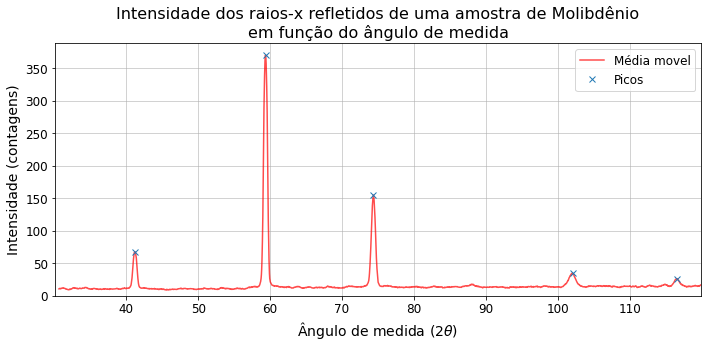

In [7]:
# Molibdênio
i = 3
plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 
             0, window_size =30, peak_min_height = 20, distance_peaks = 50)

[ 329  441  552 1115 1882 2163 2357 2810 3706 3960] {'peak_heights': array([ 19.88235294, 280.64705882,  71.47058824,  31.47058824,
        89.88235294,  14.64705882,  37.17647059,  19.17647059,
        19.94117647,  27.29411765])} 
 angulos dos picos: 
 329      32.62
441      34.86
552      37.08
1115     48.34
1882     63.68
2163     69.30
2357     73.18
2810     82.24
3706    100.16
3960    105.24
Name: angulo, dtype: float64


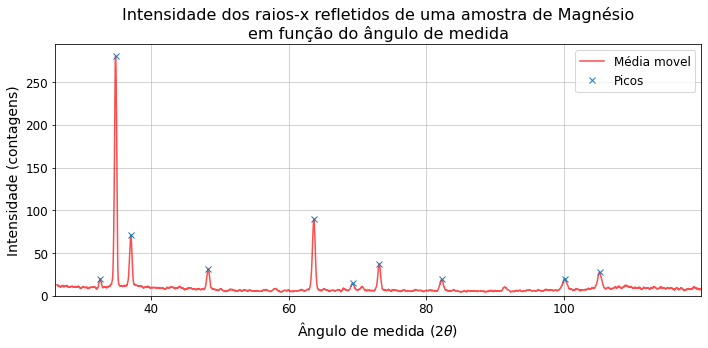

In [8]:
# Magnésio
i = 2
plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 
             0, window_size = 17, peak_min_height = 13, distance_peaks = 80)

[1196 1549 2734 3525] {'peak_heights': array([ 38.78,  70.16, 116.52,  71.82])} 
 angulos dos picos: 
 1196    43.96
1549    51.02
2734    74.72
3525    90.54
Name: angulo, dtype: float64


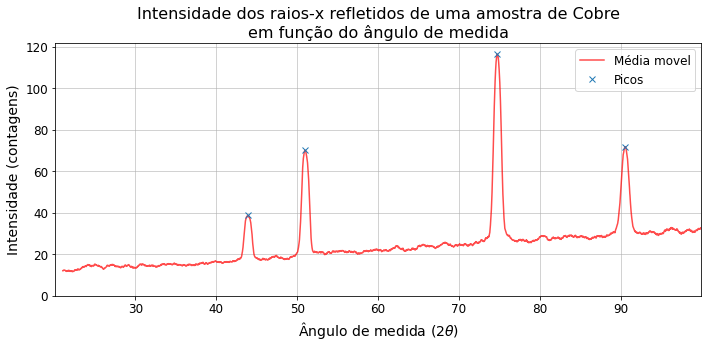

In [9]:
# Cobre
i = 1
plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 
             0, window_size = 50, peak_min_height = 38, distance_peaks = 80)

[  53  123  214  317  416  541  768 1288 1649 1761 2503 3398 3687 4209] {'peak_heights': array([16.  , 31.1 ,  9.75,  9.7 ,  8.55,  8.15, 59.25,  8.75, 16.4 ,
        9.45,  9.1 , 20.5 , 17.2 ,  8.2 ])} 
 angulos dos picos: 
 53       31.10
123      32.50
214      34.32
317      36.38
416      38.36
541      40.86
768      45.40
1288     55.80
1649     63.02
1761     65.26
2503     80.10
3398     98.00
3687    103.78
4209    114.22
Name: angulo, dtype: float64


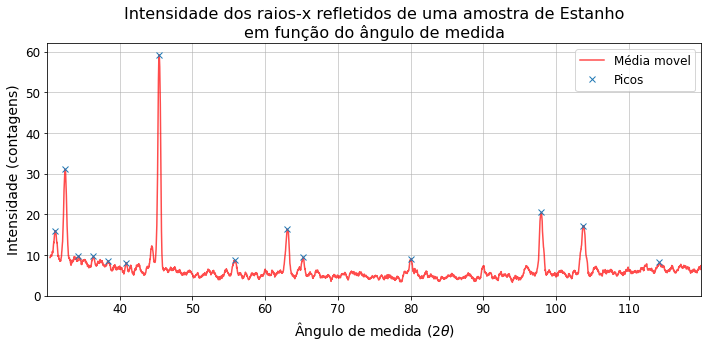

In [10]:
# Estanho
i = 0
plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 
             0, window_size = 20, peak_min_height = 8, distance_peaks = 70)
plt.savefig('espectro_estanho_picos.svg', dpi=300)

[ 483 2053 3947] {'peak_heights': array([ 592.55, 7665.5 ,   40.55])} 
 angulos dos picos: 
 483     29.70
2053    61.10
3947    98.98
Name: angulo, dtype: float64


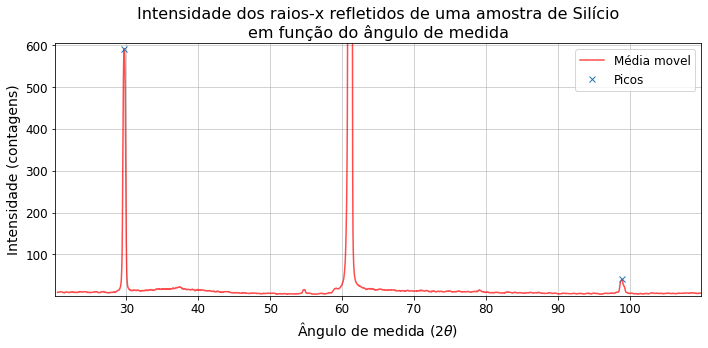

In [11]:
# Silício
i = 4
plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 
             (1,605), window_size = 20, peak_min_height = 30, distance_peaks = 80)

[ 353 1759 3378] {'peak_heights': array([47561.16666667, 37968.03333333,  3226.86666667])} 
 angulos dos picos: 
 353     27.10
1759    55.22
3378    87.60
Name: angulo, dtype: float64


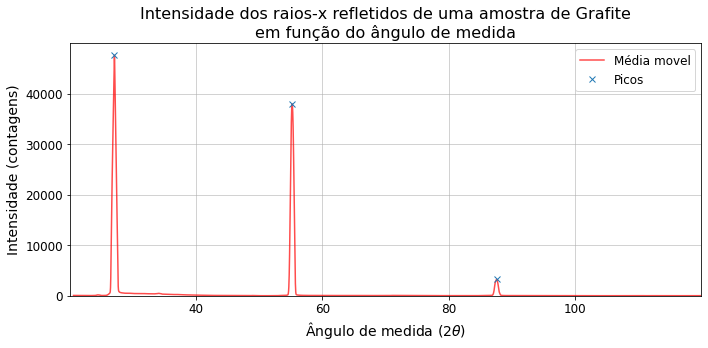

In [15]:
# Grafite
i = 5
plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 
             0, window_size = 30, peak_min_height = 700, distance_peaks = 100)

plt.savefig('espectro_grafite_picos.svg', dpi=300)

# esse aqui deu uns probleminhas e eu deixei com uns picos a mais pra gente escolher na mão
# o limite tá cortando o gráfico só pra dar pra enxergar os picos mais baixos